In [1]:
import matplotlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, TimeDistributed
from tensorflow.keras.metrics import RootMeanSquaredError

In [4]:
#  means that the dates in the first column (index 0) of the CSV file (ENSO.csv) will be parsed as datetime objects
df_enso = pd.read_csv('/content/ENSO.csv', parse_dates=[0])
df_enso

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,2023-02-01,2023,FEB,1.00,26.80,0.71,26.25,-0.13,26.29,-0.44,...,NaN,-1.15,1.4,1.4,JF,-0.8,JFM,-0.4,2023-2024,NaN
878,2023-03-01,2023,MAR,1.23,28.12,1.52,27.52,0.36,27.23,-0.01,...,NaN,-1.89,1.4,0.2,FM,-0.7,FMA,-0.1,2023-2024,NaN
879,2023-04-01,2023,APR,0.98,28.18,2.45,28.02,0.44,27.99,0.19,...,NaN,-0.65,0.6,0.2,MA,-0.4,MAM,0.2,2023-2024,NaN
880,2023-05-01,2023,MAY,0.96,26.63,2.02,28.11,0.90,28.35,0.47,...,NaN,-0.67,-0.2,-1.0,AM,-0.1,AMJ,0.5,2023-2024,NaN


In [5]:
df_enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          882 non-null    datetime64[ns]
 1   Year                          882 non-null    int64         
 2   Month                         882 non-null    object        
 3   Global Temperature Anomalies  882 non-null    float64       
 4   Nino 1+2 SST                  498 non-null    float64       
 5   Nino 1+2 SST Anomalies        498 non-null    float64       
 6   Nino 3 SST                    498 non-null    float64       
 7   Nino 3 SST Anomalies          498 non-null    float64       
 8   Nino 3.4 SST                  498 non-null    float64       
 9   Nino 3.4 SST Anomalies        498 non-null    float64       
 10  Nino 4 SST                    498 non-null    float64       
 11  Nino 4 SST Anomalies          49

In [6]:
df_enso.describe()

,Year,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,MEI.v2,ONI
count,882.000000,882.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,875.000000,882.000000,574.0000,870.000000,534.000000,882.000000
mean,1986.251701,0.337971,23.250542,-0.049859,25.967731,-0.065743,27.016325,-0.079859,28.451727,-0.100904,-0.418517,-0.109002,0.0500,0.154138,-0.067228,-0.003175
std,21.230643,0.345478,2.328832,1.046806,1.233975,0.853805,0.945222,0.829843,0.679232,0.634455,1.361371,1.034818,0.9789,0.940521,0.987631,0.832301
min,1950.000000,-0.370000,19.060000,-1.900000,23.380000,-2.160000,24.560000,-2.220000,26.360000,-1.870000,-3.376000,-3.650000,-2.8000,-3.600000,-2.500000,-2.000000
25%,1968.000000,0.060000,21.220000,-0.740000,24.985000,-0.650000,26.340000,-0.670000,28.000000,-0.570000,-1.458500,-0.787500,-0.6000,-0.400000,-0.800000,-0.600000
50%,1986.000000,0.300000,23.140000,-0.240000,25.935000,-0.170000,27.060000,-0.110000,28.560000,-0.020000,-0.497000,-0.080000,0.1000,0.200000,-0.100000,-0.100000
75%,2005.000000,0.610000,25.230000,0.440000,26.902500,0.417500,27.690000,0.440000,28.977500,0.370000,0.384500,0.600000,0.7000,0.800000,0.500000,0.500000
max,2023.000000,1.340000,28.510000,4.030000,28.810000,3.070000,29.540000,2.720000,30.220000,1.550000,4.227000,2.870000,2.3000,2.900000,2.700000,2.600000


In [7]:
# missing values
df_enso.isna().sum(axis=0)

Date                              0
Year                              0
Month                             0
Global Temperature Anomalies      0
Nino 1+2 SST                    384
Nino 1+2 SST Anomalies          384
Nino 3 SST                      384
Nino 3 SST Anomalies            384
Nino 3.4 SST                    384
Nino 3.4 SST Anomalies          384
Nino 4 SST                      384
Nino 4 SST Anomalies            384
TNI                               7
PNA                               0
OLR                             308
SOI                              12
Season (2-Month)                  0
MEI.v2                          348
Season (3-Month)                  0
ONI                               0
Season (12-Month)                 0
ENSO Phase-Intensity              6
dtype: int64

In [8]:
# set index
df_enso.set_index('Date', inplace = True)
df_enso.head(5)

,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


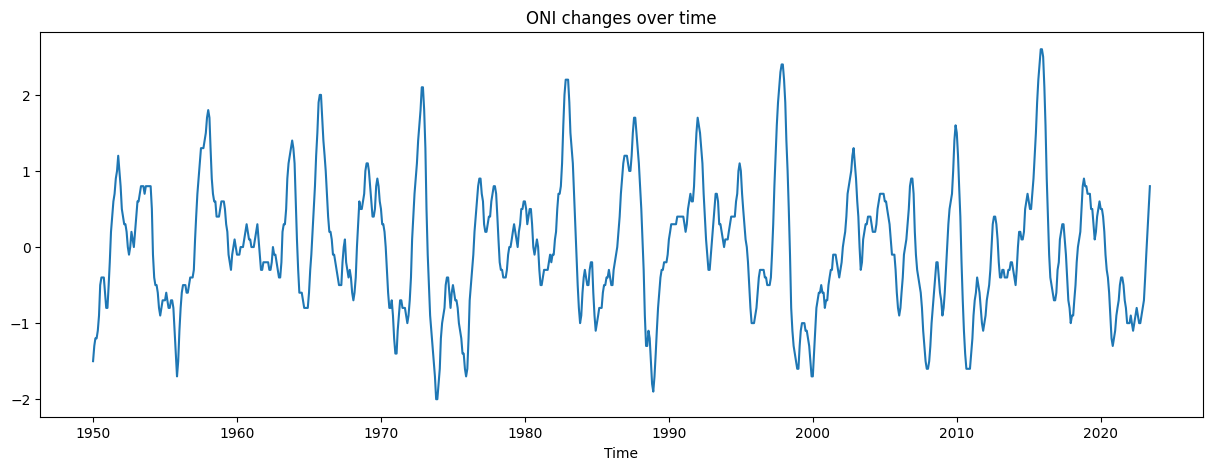

'\nThe code is plotting the changes in ONI values\n over time to visualize the variability of the El Niño-Southern Oscillation phenomenon.\n '

In [10]:
# ONI time series
plt.figure(figsize=(15,5))
plt.plot(df_enso.ONI)
plt.title('ONI changes over time')
plt.xlabel('Time')
plt.show()
'''
The code is plotting the changes in ONI values
 over time to visualize the variability of the El Niño-Southern Oscillation phenomenon.
 '''

In [11]:
# ONI interactive time series
plot = px.line(data_frame=df_enso, y='ONI', labels={'Date':'Time'},
               title='ONI changes over time')
plot.show()

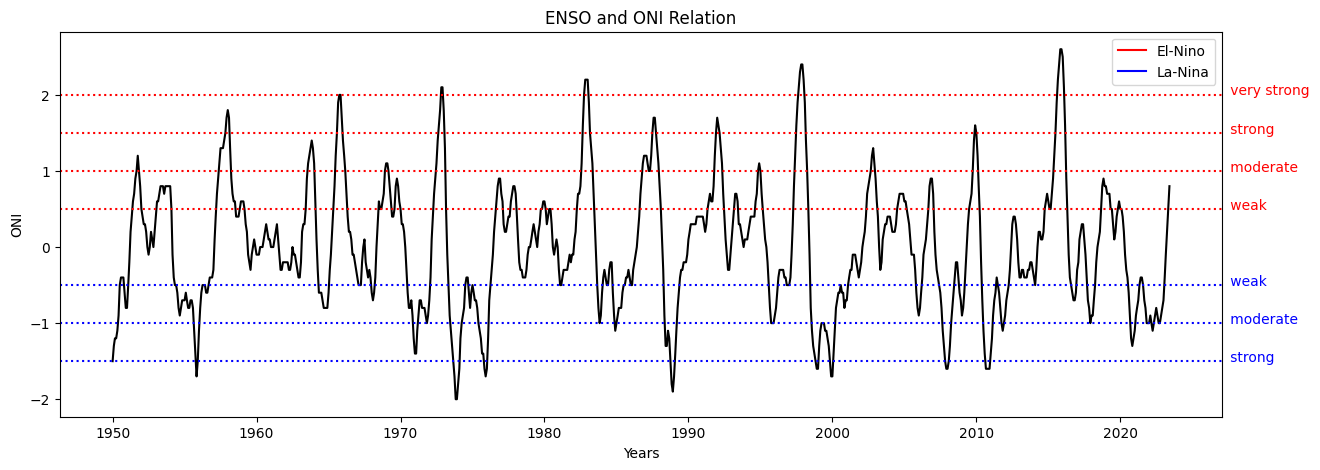

'\nThe plot provides a visual representation of\nhow ONI values correspond to different phases \nand intensities of the ENSO phenomenon,\nmaking it easier to interpret the relationship between ONI and ENSO.\n'

In [13]:
# ONI and ENSO relation

plt.figure(figsize=(15, 5))

# convert dates to numbers to get x-axis range
x = matplotlib.dates.date2num(df_enso.index)

# plot Year and ONI
plt.plot(df_enso.ONI, color='black')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.title('ENSO and ONI Relation')

# add horizontal lines and labels to define ENSO phase and intensity

plt.axhline(y=2, color='r', linestyle=':')
plt.text(x=x[-1], y=2, color='red', s='              very strong')

plt.axhline(y=1.5, color='r', linestyle=':')
plt.text(x=x[-1], y=1.5, color='red', s='              strong')

plt.axhline(y=1, color='r', linestyle=':')
plt.text(x[-1], 1, color='r', s='              moderate')

plt.axhline(y=0.5, color='r', linestyle=':')
plt.text(x[-1], 0.5, color='r', s='              weak')

plt.axhline(y=-0.5, color='b', linestyle=':')
plt.text(x[-1], -0.5, color='b', s='              weak')

plt.axhline(y=-1, color='b', linestyle=':')
plt.text(x[-1], -1, color='b', s='              moderate')

plt.axhline(y=-1.5, color='b', linestyle=':')
plt.text(x[-1], -1.5, color='b', s='              strong')

# custom legends
line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
plt.legend(handles=[line_red, line_blue])

plt.show()
'''
The plot provides a visual representation of
how ONI values correspond to different phases
and intensities of the ENSO phenomenon,
making it easier to interpret the relationship between ONI and ENSO.
'''





In [14]:
# missing values in ONI
df_enso.ONI.isna().sum(axis=0)


0

In [15]:
# function to transform time series data into supervised learning data
# the transformation is necessary to get input (x) and output (y) sequences
# this function can be used for univariate, multivariate, one-step, and multi-step forecasting

# in one-step, n_in and n_out = 1
# in multi-step, n_in and n_out > 1
# in univariate, the number of variables/columns = 1
# in multivariate, the number of variables/columns > 1

# there are two types of multivariate forecasting i.e whether you want to forecast all input variables or one of them
# if you want to predict one of the input variables, make it the last column of the dataframe


def series_to_supervised(data, n_in=1, n_out=1, n_vars=1, forecast_all=True,
                         dropnan=True):
    """
    Frame a time series as a supervised learning dataset
    Parameters:
        data: Sequence of observations, type = dataframe
        n_in: prior timesteps or Number of lag observations as input (x)
        n_out: next timesteps or Number of ahead observations as output (y)
        n_vars: number of variables or number of columns
        forecast_all: to forecast all or one variable
        dropnan: Boolean whether or not to drop rows with NaN values
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """

    cols, names = list(), list()

    if n_vars == 1:    # univariate
        # input sequence or previous timesteps (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names.append(f'var1 (t-{i})')
        # current time steps (t)
        cols.append(data)
        names.append('var1 (t)')
        # forecast sequence or next timesteps (t+1, ... t+n)
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names.append(f'var1 (t+{i})')
    elif forecast_all:    # mutlivariate type 1
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data)
        names += [f'var{j+1} (t)' for j in range(n_vars)]
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names += [f'var{j+1} (t+{i})'for j in range(n_vars)]
    else:    # multivariate type 2
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data.iloc[:, -1])
        names.append('VAR (t)')
        for i in range(1, n_out):
            cols.append(data.shift(-i).iloc[:,-1])
            names.append(f'VAR (t+{i})')
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [16]:
# specify the size of the sliding window (n_lag, n_ahead)
# use the ONI of the previous time steps (e.g. previous 12 months) to predict the ONI of the next time steps (e.g. next 2 months)

n_in = 12
n_out = 3
# timesteps & features
n_steps = n_in
n_features = 1   # we are using only one feature/variable i.e oni

In [17]:
# transform data to get input (x) and output (y)
# x = enso indicators, y = ONI

df_reframed = series_to_supervised(df_enso['ONI'], n_in, n_out, n_features)
df_reframed

,var1 (t-12),var1 (t-11),var1 (t-10),var1 (t-9),var1 (t-8),var1 (t-7),var1 (t-6),var1 (t-5),var1 (t-4),var1 (t-3),var1 (t-2),var1 (t-1),var1 (t),var1 (t+1),var1 (t+2)
Date,,,,,,,,,,,,,,,
1951-01-01,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2
1951-02-01,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2
1951-03-01,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4
1951-04-01,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1951-05-01,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-1.0,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8,-0.7,-0.4
2023-01-01,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8,-0.7,-0.4,-0.1
2023-02-01,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8,-0.7,-0.4,-0.1,0.2


In [18]:
# train-validation-test split (80:10:10)

n = df_reframed.shape[0]
n_train, n_valid = int(0.8 * n), int(0.1 * n)
df_train = df_reframed.values[:n_train, :]
df_valid = df_reframed.values[n_train:n_train + n_valid, :]
df_test = df_reframed.values[n_train + n_valid:, :]

In [19]:
x_train, y_train,= df_train[:, :-n_out], df_train[:, -n_out:]
x_valid, y_valid = df_valid[:, :-n_out], df_valid[:, -n_out:]
x_test, y_test =  df_test[:, :-n_out], df_test[:, -n_out:]

In [20]:
# normalize data
# use separate scalers for features(x) and labels/target (y), to easily revert the scaling later

x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler =  MinMaxScaler(feature_range=(0,1))

x_train, y_train = x_scaler.fit_transform(x_train),y_scaler.fit_transform(y_train)
x_valid, y_valid = x_scaler.transform(x_valid), y_scaler.transform(y_valid)
x_test, y_test = x_scaler.transform(x_test), y_scaler.transform(y_test)

In [23]:
# reshape input [samples (rows), timesteps, features]
x_train = x_train.reshape(x_train.shape[0], n_steps, n_features)
x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_features)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_features)

In [24]:
# design network
model = Sequential(name='lstm')
model.add(LSTM(50, input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(units = 50))
model.add(Dense(n_out))
model.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 30753 (120.13 KB)
Trainable params: 30753 (120.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# compile & train network
model.compile(loss='mean_squared_error', optimizer='adam',
                   metrics=['mae', 'mape', RootMeanSquaredError()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                           shuffle=False, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
22/22 - 8s - loss: 0.0883 - mae: 0.2317 - mape: 877463.2500 - root_mean_squared_error: 0.2972 - val_loss: 0.0472 - val_mae: 0.1660 - val_mape: 51.0746 - val_root_mean_squared_error: 0.2172 - 8s/epoch - 385ms/step
Epoch 2/50
22/22 - 0s - loss: 0.0324 - mae: 0.1360 - mape: 1242415.0000 - root_mean_squared_error: 0.1801 - val_loss: 0.0394 - val_mae: 0.1501 - val_mape: 51.2931 - val_root_mean_squared_error: 0.1984 - 283ms/epoch - 13ms/step
Epoch 3/50
22/22 - 0s - loss: 0.0284 - mae: 0.1270 - mape: 1266554.2500 - root_mean_squared_error: 0.1685 - val_loss: 0.0379 - val_mae: 0.1476 - val_mape: 50.2664 - val_root_mean_squared_error: 0.1946 - 294ms/epoch - 13ms/step
Epoch 4/50
22/22 - 0s - loss: 0.0266 - mae: 0.1234 - mape: 1226917.1250 - root_mean_squared_error: 0.1630 - val_loss: 0.0360 - val_mae: 0.1444 - val_mape: 48.7312 - val_root_mean_squared_error: 0.1897 - 287ms/epoch - 13ms/step
Epoch 5/50
22/22 - 0s - loss: 0.0245 - mae: 0.1189 - mape: 1159546.2500 - root_mean_squared_err

In [26]:
# save model
model.save('model_lstm.h5')


In [27]:
# evaluate model
eval_lstm = model.evaluate(x=x_test, y=y_test, return_dict=True)
eval_lstm

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - mae: 0.0573 - mape: 16.4188 - root_mean_squared_error: 0.0713


{'loss': 0.005079463589936495,
 'mae': 0.05734286084771156,
 'mape': 16.41883659362793,
 'root_mean_squared_error': 0.07127036154270172}

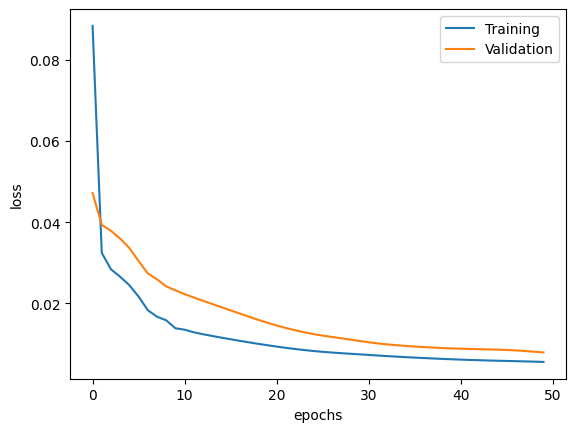

In [28]:
# trianing andd validation loss

plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [29]:
# predict
y_hat = model.predict(x_test)

3/3 [==============================] - 1s 9ms/step


In [30]:
# revert the scaling
y_hat = np.round(y_scaler.inverse_transform(y_hat), 1)

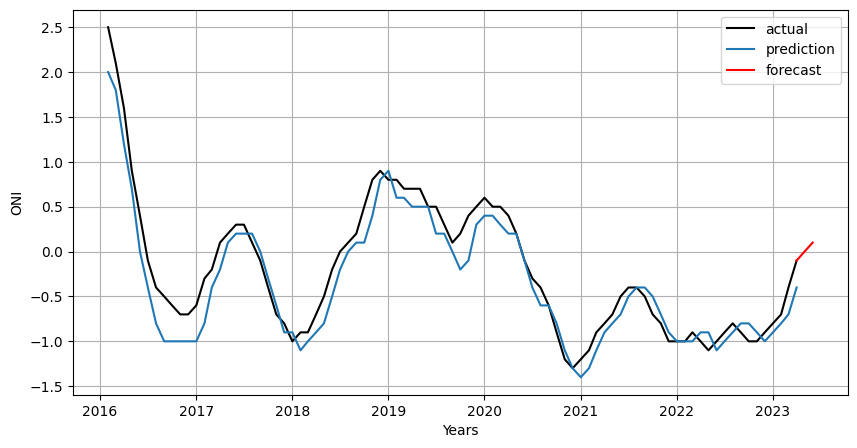

In [31]:
# plot results

# y_test has three columns:
# column 0 = oni values for next month
# column 1 = oni values for the second next month
# column 2 = oni values for the third next month

# plot the oni actual (y_test) and predicted (y_hat) values for the next month
# plot y_hat last row values as the forecast for the next 3 months


# find y_test start row index to get the start of the date range
# add 1 because the values are for the next month
y_start = n_train + n_valid + 1

# oni actual values
y_actual = pd.DataFrame(index = df_reframed.index[y_start:],
                        data = y_scaler.inverse_transform(y_test)[:-1, 0])

# oni predicted values
y_predict = pd.DataFrame(index = df_reframed.index[y_start:],
                         data = y_hat[:-1, 0])

# oni forecast values
y_forecast = pd.DataFrame(index = pd.date_range(start=df_reframed.index[-1],
                                                periods=n_out, freq= 'MS'),
                          data = y_hat[-1, :])

plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='actual', color='k')
plt.plot(y_predict, label='prediction')
plt.plot(y_forecast, label='forecast', color='r')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.legend()
plt.grid()
plt.show()